In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
from sklearn import metrics,utils
from sklearn.model_selection import KFold,train_test_split
import numpy as np
from matplotlib.colors import ListedColormap
import csv
import pandas as pd
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [2]:
def load_my_dataset(dataset):
    with open(dataset) as csv_file:
        data_file = csv.reader(csv_file)
        feature = []
        result = []
        for row in data_file:
            try:
                feature.append([float(row[0]), float(row[1])])
                result.append(int(row[2]))
            except ValueError:
                pass
        data = np.asarray(feature)
        target = np.asarray(result)
        feature_names = ['CDR', 'Exudate_Pixel']
        target_names = ['glaucoma','normal','others']

    return utils.Bunch(data=data, target=target, feature_names = feature_names, target_names = target_names)

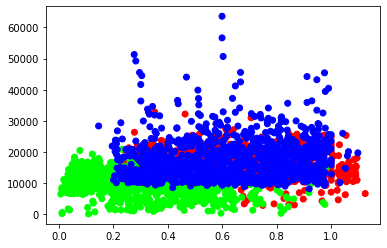

In [3]:
data = load_my_dataset('DisisionTreeต้น.csv')
X,y = data.data, data.target

plt.scatter(X[:,0], X[:,1],c=y,cmap=cmap_bold)
plt.savefig('dataset.jpg')

In [4]:
def acc_sens_spec(y_true, y_pred):
    metric_confusion = metrics.confusion_matrix(y_true, y_pred)
    tp = metric_confusion[0,0]
    fn = metric_confusion[0,1]
    fp = metric_confusion[1,0]
    tn = metric_confusion[1,1]
    print("tp =",tp)
    print("fn =",fn)
    print("fp =",fp)
    print("tn =",tn)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    precision = tp / (tp+fp)
    recall = sensitivity
    f1score = 2 * ((precision*recall) / (precision + recall))
    return accuracy, specificity, sensitivity, f1score, precision

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.9,test_size = 0.1,random_state=42)

In [6]:
acc_fold = []
sens_fold = []
spec_fold = []
model = []
predict = []
true = []
proba = []
pre_fold = []
f1_fold = []

tp = 70
fn = 5
fp = 20
tn = 135


<ipython-input-7-12479b4c494c>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z, cmap=cmap_light)


tp = 68
fn = 14
fp = 17
tn = 143


<ipython-input-7-12479b4c494c>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z, cmap=cmap_light)


tp = 98
fn = 10
fp = 25
tn = 131


<ipython-input-7-12479b4c494c>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z, cmap=cmap_light)


tp = 86
fn = 14
fp = 12
tn = 137


<ipython-input-7-12479b4c494c>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z, cmap=cmap_light)


tp = 53
fn = 9
fp = 9
tn = 137


<ipython-input-7-12479b4c494c>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z, cmap=cmap_light)


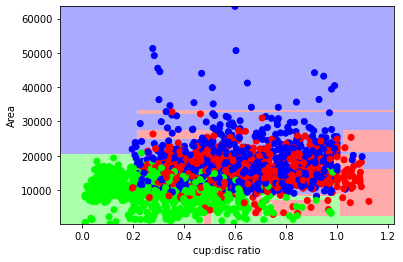

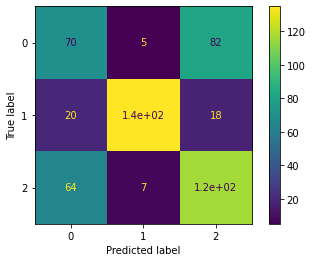

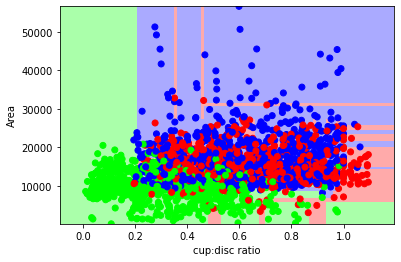

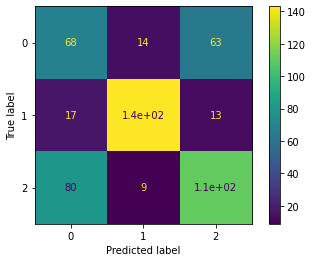

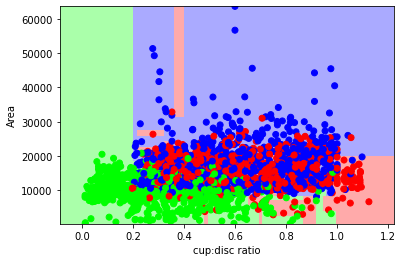

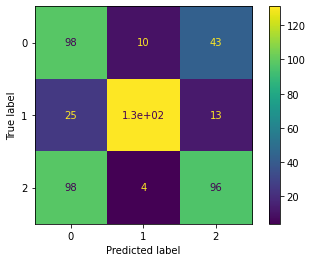

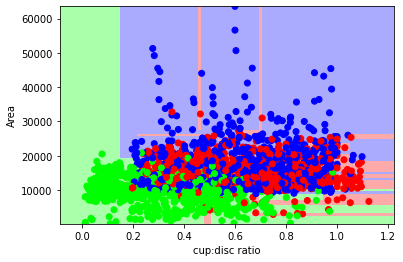

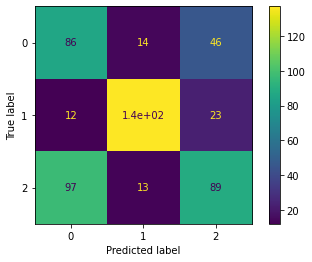

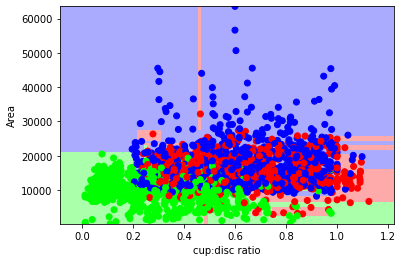

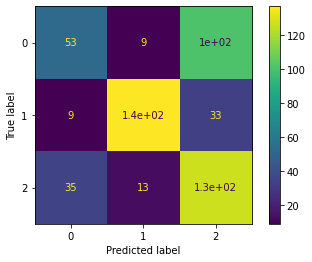

In [7]:
SEED = 1
fold = KFold(shuffle=True)
#fold = StratifiedKFold(n_splits=5, shuffle=True)
i = 1
for train_index, test_index in fold.split(X_train,y_train):
    x1_train, y1_train = X_train[train_index] , y_train[train_index]
    x1_test, y1_test = X_train[test_index] , y_train[test_index]
    
    dt = DecisionTreeClassifier(max_depth=10,random_state=SEED)
    #dt = KNeighborsClassifier(n_neighbors=5)
    dt.fit(x1_train, y1_train)
    
    model.append(dt)
    y_pred = dt.predict(x1_test)
    predict.append(y_pred)
    proba.append(dt.predict_proba(x1_test))
    true.append(y1_test)
    accuracy, specificity, sensitivity, precision, f1score = acc_sens_spec(y1_test, y_pred)
    acc_fold.append(accuracy)
    spec_fold.append(specificity)
    sens_fold.append(sensitivity)
    pre_fold.append(precision)
    f1_fold.append(f1score)

    #plot on graph
    x_min, x_max = x1_train[:, 0].min() - .1, x1_train[:, 0].max() + .1
    y_min, y_max = x1_train[:, 1].min() - .1, x1_train[:, 1].max() + .1
    xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
    Z = dt.predict(np.c_[xx.ravel(),yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z, cmap=cmap_light)

    plt.scatter(x1_train[:, 0], x1_train[:,1], c=y1_train, cmap=cmap_bold)
    plt.xlabel('cup:disc ratio')
    plt.ylabel('Area')
    plt.savefig('fold'+str(i)+'.jpg')
    i=i+1
    
    metrics.plot_confusion_matrix(dt, x1_test, y1_test)

In [8]:
print(acc_fold)

[0.8913043478260869, 0.871900826446281, 0.8674242424242424, 0.8955823293172691, 0.9134615384615384]


tp = 33
fn = 5
fp = 7
tn = 80


<ipython-input-9-66ec7bf2ec0e>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z, cmap=cmap_light)


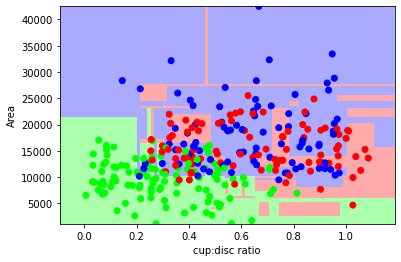

In [9]:
best_model = model[acc_fold.index(max(acc_fold))]
pkl_filename = "DisisionTree_modelลบเกินไม่เอา.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

test_model = best_model.predict(X_test)
accuracy_test, specificity_test, sensitivity_test, precision_test, f1score_test = acc_sens_spec(y_test, test_model)

x_min, x_max = X_test[:, 0].min() - .1, X_test[:, 0].max() + .1
y_min, y_max = X_test[:, 1].min() - .1, X_test[:, 1].max() + .1
xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:,1], c=y_test, cmap=cmap_bold)
plt.xlabel('cup:disc ratio')
plt.ylabel('Area')
plt.savefig('fold_test.jpg')

In [10]:
for i in range(1,6):
    print("Fold Number :",i)
    print("Accuracy    :",round(acc_fold[i-1],4))
    print("Specificity :",round(spec_fold[i-1],4))
    print("Sensitivity :",round(sens_fold[i-1],4))
    print("Precision   :",round(pre_fold[i-1],4))
    print("F1score     :",round(f1_fold[i-1],4))
    print()

print("Best Fold Number :",acc_fold.index(max(acc_fold))+1)
print("Accuracy    :",accuracy_test)
print("Specificity :",specificity_test)
print("Sensitivity :",sensitivity_test)
print("Precision   :",precision_test)
print("F1score     :",f1score_test)
print("\n")

Fold Number : 1
Accuracy    : 0.8913
Specificity : 0.871
Sensitivity : 0.9333
Precision   : 0.8485
F1score     : 0.7778

Fold Number : 2
Accuracy    : 0.8719
Specificity : 0.8938
Sensitivity : 0.8293
Precision   : 0.8144
F1score     : 0.8

Fold Number : 3
Accuracy    : 0.8674
Specificity : 0.8397
Sensitivity : 0.9074
Precision   : 0.8485
F1score     : 0.7967

Fold Number : 4
Accuracy    : 0.8956
Specificity : 0.9195
Sensitivity : 0.86
Precision   : 0.8687
F1score     : 0.8776

Fold Number : 5
Accuracy    : 0.9135
Specificity : 0.9384
Sensitivity : 0.8548
Precision   : 0.8548
F1score     : 0.8548

Best Fold Number : 5
Accuracy    : 0.904
Specificity : 0.9195402298850575
Sensitivity : 0.868421052631579
Precision   : 0.8461538461538461
F1score     : 0.825


